In [1]:
from IPython.display import Image, display

from langchain_mcp_adapters.client import MultiServerMCPClient

from react_agent.src.agents.react_agent import ReActAgent
from react_agent.src.agents.triage import Triage

from react_agent.src.config.system_parameters import TriageSettings

from react_agent.src.util.tools_fabric import ToolsFabric

In [2]:
USE_MCP = False
DEBUG_MODE = True
USE_TRIAGE = True

In [3]:
mapping_question = "Explain how 'Payment Terms' is mapped. Start with 'map_invoice1'."
extensibility_question = "As a Public Cloud customer in Spain, can I extend an existing eDocument customer invoice Process?"
peppol_support = "We as Syntax are currently implementing SAP DRC and are following the official SAP help. We are currently at the step “Integration of Peppol Exchange with SAP S/4HANA Cloud” and there at the creation of an S/4HANA Public Cloud communication user. A client certificate should be uploaded for the communication user to be created, as Basic Auth (via user + password) is not supported. The problem: We do not have this certificate. Where can I get this certificate? What format must it be in? We are stuck at this step because we are missing the certificate mentioned and it is also not clear to us what kind of certificate is meant here and where to get it."
france_us = "As a localization developer, I want to enhance the relevancy check in the France eDocument country class with the new source type so that settlement management documents become relevant for the eDocument process and eDocuments are created for the source documents. How can I Achieve this?"

QUERY = mapping_question

In [4]:
if USE_TRIAGE:
    triage_agent = Triage()

    query_categorization = triage_agent.triage_user_message(user_message=QUERY)
    if DEBUG_MODE:
        print(f"query categorization: {query_categorization}")

query categorization: {'user_query': "Explain how 'Payment Terms' is mapped. Start with 'map_invoice1'.", 'category': 'Config-RCA'}


In [5]:
if USE_TRIAGE:
    tools = ToolsFabric.get_tools_for_category(
        use_mcp=USE_MCP,
        configuration=query_categorization["category"],
    )
else:
    tools = ToolsFabric.get_tools_for_category(
        use_mcp=USE_MCP,
        configuration=TriageSettings.Categories.ALL,
    )

## Role
You are an expert in Electronic Document Processing, with deep domain knowledge in SAP Document and Reporting Compliance, Peppol, UBL, and eInvoicing standards.

## Objective
Use a reason-and-act (ReAct) approach to answer user questions with clear, well-supported reasoning chains, and tool-validated outputs. Final answers must reflect insights derived from specific tool calls.

## Instructions
**You will operate in a strict step-by-step loop. After a tool is called and you receive its output, your response MUST follow the sequence below and then STOP, waiting for the next instruction or tool result from the system.**
1. Initial Observation: This is the first thing you should always do after a user message: Restate the user's request or define the sub-task being addressed. Clearly establish the current focus.
2. Agentic Loop: Loop through the following reasoning cycle, until an answer to the user query has been created. The answer **must** be supported by information coming fro

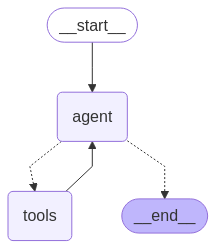

================================ Human Message =================================

Explain how 'Payment Terms' is mapped. Start with 'map_invoice1'.
================================== Ai Message ==================================

Initial Observation:  
The user wants to understand how 'Payment Terms' are mapped, specifically starting from the function or method 'map_invoice1'. The focus is on tracing the mapping logic for 'Payment Terms' within the ABAP codebase, beginning with 'map_invoice1'.

Thought:  
To address this, I need to locate the implementation of 'map_invoice1' and examine how it handles or delegates the mapping of 'Payment Terms'. The best approach is to search for the method 'map_invoice1' and review its code to identify any references to 'Payment Terms' or related mapping logic.

Action Plan:  
1. Search for the ABAP method 'map_invoice1' to retrieve its implementation.
2. Analyze the method to find how 'Payment Terms' are mapped or which sub-methods handle this mappin

In [6]:
if USE_MCP:
    async with MultiServerMCPClient(tools) as client:
        agent = ReActAgent(tool_list=client.get_tools())
        if DEBUG_MODE:
            print(agent.create_sys_prompt())
            display(Image(agent.get_agent_graph()))

        await agent.arun_agent_with_input(user_message=QUERY, debug=DEBUG_MODE)
else:
    agent = ReActAgent(tool_list=tools)
    if DEBUG_MODE:
        print(agent.create_sys_prompt())
        display(Image(agent.get_agent_graph()))

    agent.run_agent_with_input(user_message=QUERY, debug=DEBUG_MODE)

In [7]:
run_data = agent.get_execution_data()

run_data.pretty_print()

Agent Run Summary
Model Used:
gpt-4.1

Execution Time: 
20.198 seconds

Token Consumption Statistics
  Input Tokens: 10097
  Output Tokens: 685
  Total Tokens: 10782

LLM call count: 3

Tools Used:
  Tool #1:
    Name: abap_method_codebase_search
    Arguments:
      query: map_invoice1
  Tool #2:
    Name: abap_method_codebase_search
    Arguments:
      query: fill_invoice payment terms
